In [39]:
import pandas as pd
import numpy as np

In [40]:
prices = pd.read_csv("sample_prices.csv")

In [41]:
prices

,BLUE,ORANGE
0,8.7000,10.6600
1,8.9055,11.0828
2,8.7113,10.7100
3,8.4346,11.5907
4,8.7254,12.1070
5,9.0551,11.7876
6,8.9514,11.2078
7,9.2439,12.5192
8,9.1276,13.3624
9,9.3976,14.4080


In [42]:
returns = prices.pct_change()
returns

,BLUE,ORANGE
0,NaN,NaN
1,0.023621,0.039662
2,-0.021807,-0.033638
3,-0.031763,0.082232
4,0.034477,0.044544
5,0.037786,-0.026381
6,-0.011452,-0.049187
7,0.032676,0.117008
8,-0.012581,0.067353
9,0.029581,0.078249


In [43]:
# TO get rid of the firs row with NaN

returns = returns.dropna() 
returns

,BLUE,ORANGE
1,0.023621,0.039662
2,-0.021807,-0.033638
3,-0.031763,0.082232
4,0.034477,0.044544
5,0.037786,-0.026381
6,-0.011452,-0.049187
7,0.032676,0.117008
8,-0.012581,0.067353
9,0.029581,0.078249
10,0.006151,-0.168261


In [44]:
returns.std()

BLUE      0.023977
ORANGE    0.079601
dtype: float64

In [49]:
# Standard Deviation formula

# Step 1: De-Mean the returns

deviations = returns - returns.mean()

squared_deviations = deviations**2

In [53]:
variance = squared_deviations.mean()
variance

# could find variance by saying "volatility = variance**2

BLUE      0.000527
ORANGE    0.005808
dtype: float64

In [54]:
# Doing in this way to know numPy command

import numpy as np

volatility = np.sqrt(variance)
volatility


BLUE      0.022957
ORANGE    0.076212
dtype: float64

In [52]:
# This will give us the population std, where we divide by n-2 instead of n-1

volatility

BLUE      0.022957
ORANGE    0.076212
dtype: float64

In [55]:
returns

,BLUE,ORANGE
1,0.023621,0.039662
2,-0.021807,-0.033638
3,-0.031763,0.082232
4,0.034477,0.044544
5,0.037786,-0.026381
6,-0.011452,-0.049187
7,0.032676,0.117008
8,-0.012581,0.067353
9,0.029581,0.078249
10,0.006151,-0.168261


In [58]:
# to get # of rows, and columns. a Twoople

returns.shape


(12, 2)

In [59]:
number_of_obs = returns.shape[0]
variance = squared_deviations.sum()/(number_of_obs - 1)
volatility = variance**0.5

In [60]:
volatility

BLUE      0.023977
ORANGE    0.079601
dtype: float64

In [61]:
#  Volatility of monthly data

returns.std()

BLUE      0.023977
ORANGE    0.079601
dtype: float64

In [62]:
# To annualize the volatility, multiply by the square-root of the periods you are dealing with(daily, monthly, quarterly)

returns.std()*np.sqrt(12)

BLUE      0.083060
ORANGE    0.275747
dtype: float64

In [63]:
returns.std()*(12**0.5)

BLUE      0.083060
ORANGE    0.275747
dtype: float64

In [73]:
returns = pd.read_csv("Portfolios_Formed_on_ME_monthly_EW.csv",
                     header=0, index_col=0, parse_dates=True, na_values=-99.99
                     )

In [74]:
returns.head()

,<= 0,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
192607,NaN,-0.43,1.52,2.68,-0.57,0.59,1.60,1.47,3.33,-1.45,0.29,-0.15,1.33,1.24,1.98,1.55,1.38,3.38,3.29
192608,NaN,3.90,3.04,2.09,3.84,3.59,3.71,1.61,2.33,5.12,2.59,4.03,3.15,2.72,4.72,1.60,1.63,0.98,3.70
192609,NaN,-1.08,-0.54,0.16,-0.48,-1.40,0.00,-0.50,-0.09,0.93,-1.87,-2.27,-0.53,0.07,-0.07,-1.64,0.64,-0.86,0.67
192610,NaN,-3.32,-3.52,-3.06,-3.29,-4.10,-2.89,-3.36,-2.95,-4.84,-1.77,-3.36,-4.83,-2.98,-2.80,-3.45,-3.27,-3.47,-2.43
192611,NaN,-0.46,3.82,3.09,-0.55,2.18,3.41,3.39,3.16,-0.78,-0.32,-0.29,4.65,3.24,3.57,3.82,2.95,3.61,2.70


In [75]:
columns = ['Lo 20', 'Hi 20']
returns = returns[columns]

In [76]:
returns.head()

,Lo 20,Hi 20
192607,-0.57,3.33
192608,3.84,2.33
192609,-0.48,-0.09
192610,-3.29,-2.95
192611,-0.55,3.16


In [77]:
returns = returns/100
returns.head()

,Lo 20,Hi 20
192607,-0.0057,0.0333
192608,0.0384,0.0233
192609,-0.0048,-0.0009
192610,-0.0329,-0.0295
192611,-0.0055,0.0316


In [78]:
# To change Names

returns.columns = ['Small Cap', 'Large Cap']
returns.head()

,Small Cap,Large Cap
192607,-0.0057,0.0333
192608,0.0384,0.0233
192609,-0.0048,-0.0009
192610,-0.0329,-0.0295
192611,-0.0055,0.0316


<AxesSubplot:>

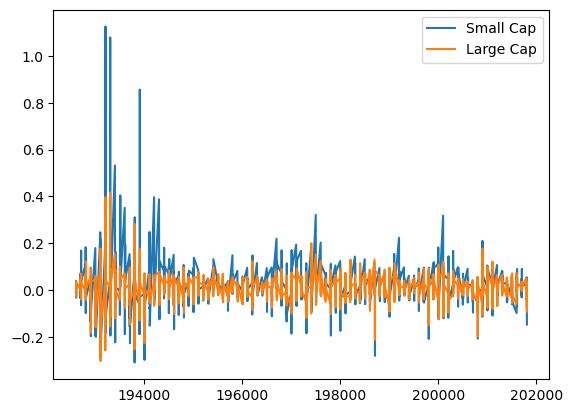

In [79]:
returns.plot.line()

In [80]:
returns.std()

Small Cap    0.097197
Large Cap    0.056325
dtype: float64

In [81]:
annualized_vol = returns.std()*(12**0.5) 
#OR
annualized_vol = returns.std()*np.sqrt(12)

In [82]:
annualized_vol

Small Cap    0.336701
Large Cap    0.195116
dtype: float64

# To Annualize returns

1. Total returns over all months
2. Annualize


In [84]:
# Total returns over all months
return_per_month = (returns+1).prod() - 1
return_per_month

Small Cap    482560.492968
Large Cap      5937.101622
dtype: float64

In [85]:
# Return per month


# Step 1, take a twoople to determine the number of rows
n_months = returns.shape[0]


return_per_month = (returns+1).prod()**(1/n_months) - 1
return_per_month

Small Cap    0.011860
Large Cap    0.007859
dtype: float64

In [86]:
annualized_return = (return_per_month+1)**12 - 1
annualized_return

Small Cap    0.151977
Large Cap    0.098490
dtype: float64

In [87]:
# TO do annualized return in a simpler way: Dividing by 12 periods

annualized_return = (returns+1).prod()**(12/n_months) - 1
annualized_return

Small Cap    0.151977
Large Cap    0.098490
dtype: float64

In [33]:
# To measure return on risk ratio

annualized_return/annualized_vol

Small Cap    0.454825
Large Cap    0.497063
dtype: float64

In [34]:
# Sharpe Ratio- excess return over risk free rate

riskfree_rate = 0.03

excess_return = annualized_return - riskfree_rate

sharpe_ratio = excess_return/annualized_vol
sharpe_ratio

Small Cap    0.373346
Large Cap    0.336392
dtype: float64

In [35]:
2+2

4